In [4]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import Nadam
import math
import matplotlib.pyplot as plt

D:\installed\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
def readDataset(filename):
    text_file = open(filename, 'r')
    dataset = []   
    for line in text_file:  
        line = line.split(',')      
        dt = [ float(x) for x in line ]
        dataset.append(dt)    
    text_file.close()
    dataset = np.array(dataset)
    return dataset
def tagData(data,perc):
    sz = math.ceil(data.shape[0]*perc/100)
    dat = np.zeros((data.shape[0],data.shape[1]*2))
    dat[:data.shape[0],:data.shape[1]] =data  #append column for labels
    dat[:data.shape[0]-1,data.shape[1]:] =data[1:,:]  #append column for labels   
    
    xtrain = dat[:sz,:4]    
    ytrain = dat[:sz,4:]
    
    xtest = dat[sz-1:,:4]
    ytest = dat[sz-1:,4:]
    
    #yopentrain = dat[:sz,4]
    #yclosetrain = dat[:sz,7]
    #yhightrain = dat[:sz,5]
    #ylowtrain = dat[:sz,6]
    
    
    #candletest = dat[sz-1:,:4]         
    
    #yopentest = dat[sz-1:,4]
    #yclosetest = dat[sz-1:,7]
    #yhightest = dat[sz-1:,5]
    #ylowtest = dat[sz-1:,6]
    
    xtrain = xtrain.reshape((xtrain.shape[0], 1, xtrain.shape[1]))
    xtest = xtest.reshape((xtest.shape[0], 1, xtest.shape[1]))
    
    return xtrain, ytrain,xtest,ytest

In [6]:
epoch = 150
percentage = 60

In [7]:

file = 'EURUSDmicro_ H4_CandleData.txt'
data = readDataset(file)

xtrain, ytrain,xtest,ytest = tagData(data,percentage)
print('training samples: ',xtrain.shape)
print('testing samples: ',xtest.shape)

training samples:  (6047, 1, 4)
testing samples:  (4031, 1, 4)


In [8]:
cand = Sequential()
cand.add(LSTM(200, input_shape=(xtrain.shape[1], xtrain.shape[2])))
cand.add(Dense(4))

In [9]:
opt = Nadam(lr=0.00001, beta_1=0.09, beta_2=0.0999, epsilon=None, schedule_decay=0.0004)


cand.compile(loss='mean_squared_error', optimizer=opt)#'Nadam'
cand_history = cand.fit(xtrain, ytrain, epochs=epoch, batch_size=72, validation_data=(xtest, ytest), verbose=1, shuffle=True)


Train on 6047 samples, validate on 4031 samples
Epoch 1/150
6047/6047 [==============================] - 3s 434us/step - loss: 1.5264 - val_loss: 1.2400
Epoch 2/150
6047/6047 [==============================] - 1s 202us/step - loss: 1.4861 - val_loss: 1.2065
Epoch 3/150
6047/6047 [==============================] - 1s 207us/step - loss: 1.4461 - val_loss: 1.1732
Epoch 4/150
6047/6047 [==============================] - 1s 192us/step - loss: 1.4065 - val_loss: 1.1403
Epoch 5/150
6047/6047 [==============================] - 1s 190us/step - loss: 1.3673 - val_loss: 1.1076
Epoch 6/150
6047/6047 [==============================] - 1s 189us/step - loss: 1.3283 - val_loss: 1.0752
Epoch 7/150
6047/6047 [==============================] - 1s 190us/step - loss: 1.2896 - val_loss: 1.0430
Epoch 8/150
6047/6047 [==============================] - 1s 198us/step - loss: 1.2511 - val_loss: 1.0110
Epoch 9/150
6047/6047 [==============================] - 1s 205us/step - loss: 1.2129 - val_loss: 0.9792
Epoch 1

6047/6047 [==============================] - 1s 203us/step - loss: 6.0820e-06 - val_loss: 3.4661e-04
Epoch 148/150
6047/6047 [==============================] - 1s 199us/step - loss: 6.0823e-06 - val_loss: 3.4658e-04
Epoch 149/150
6047/6047 [==============================] - 1s 227us/step - loss: 6.0779e-06 - val_loss: 3.4642e-04
Epoch 150/150
6047/6047 [==============================] - 1s 189us/step - loss: 6.0603e-06 - val_loss: 3.4651e-04


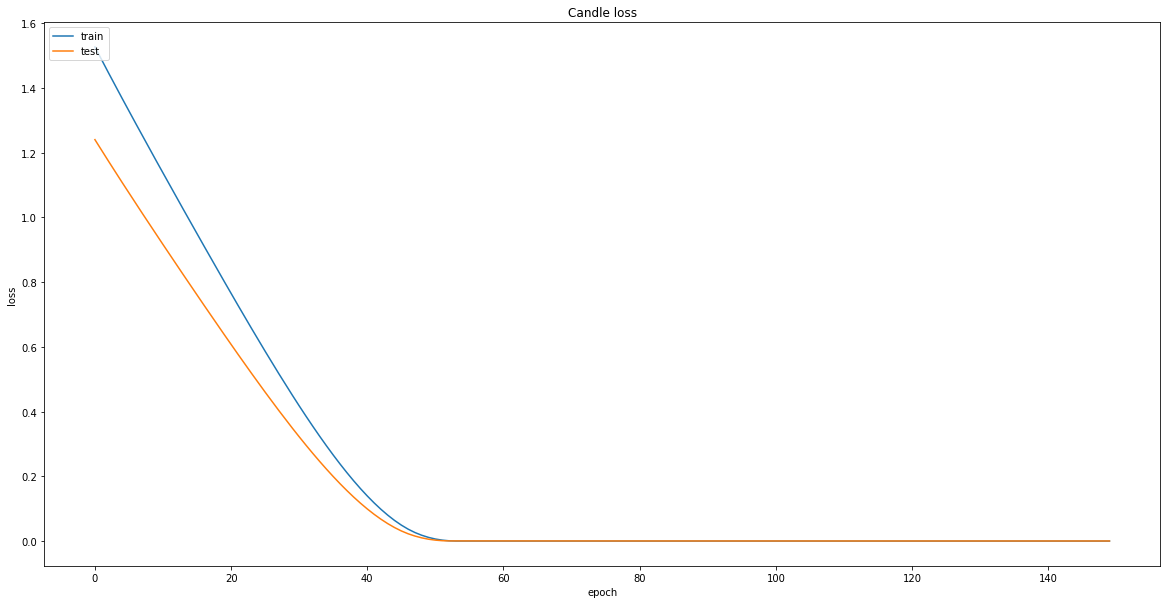

In [10]:
plt.figure(figsize=(20,10))
plt.plot(cand_history.history['loss'])
plt.plot(cand_history.history['val_loss'])
plt.title('Candle loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
# input: [1.16066000,1.16242000,1.15877000,1.16092000]
# output: [1.16089000,1.16100000,1.15628000,1.15677000]

n = np.array([1.16066000,1.16242000,1.15877000,1.16092000])
n = n.reshape((1, 1, 4))
print('predicted candle',cand.predict(n))

predicted candle [[1.1601537 1.1622899 1.1580604 1.160286 ]]


In [14]:
modelFolder = 'Models\\'
cand.save(modelFolder+'fullCandle.h5')

In [12]:
print('predicting candles')
prediCand = cand.predict(xtest)
print(prediCand.shape)

predicting candles
(4031, 4)


In [13]:
prediOpen = prediCand[:,0]
prediHigh = prediCand[:,1]
prediLow = prediCand[:,2]
prediClose = prediCand[:,3]

actOpen = ytest[:,0]
actHigh = ytest[:,1]
actLow = ytest[:,2]
actClose = ytest[:,3]


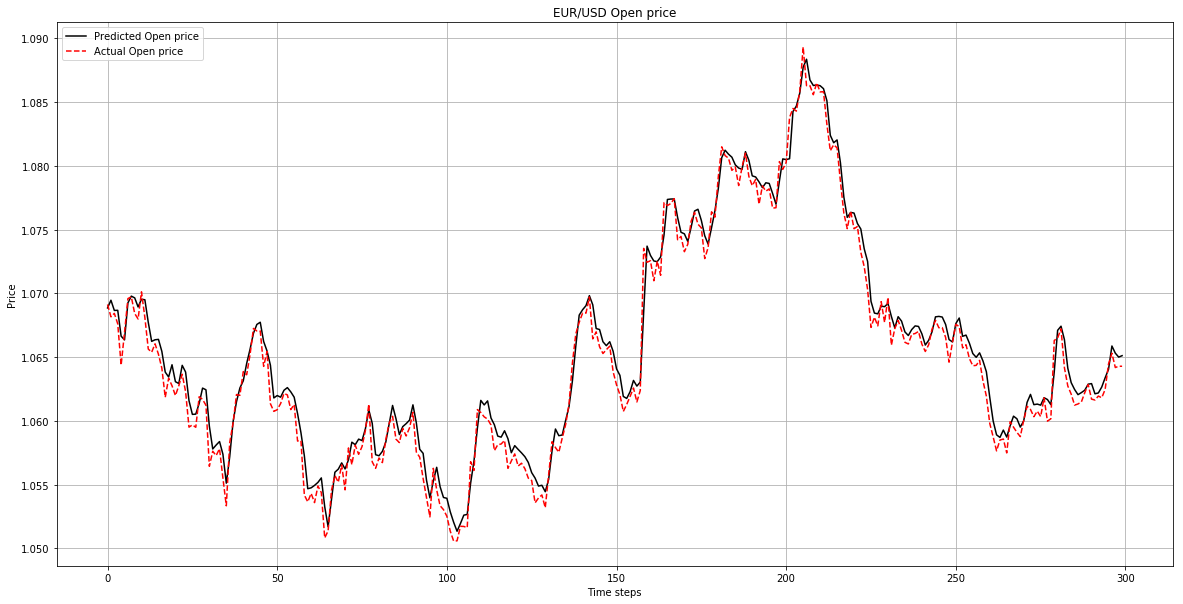

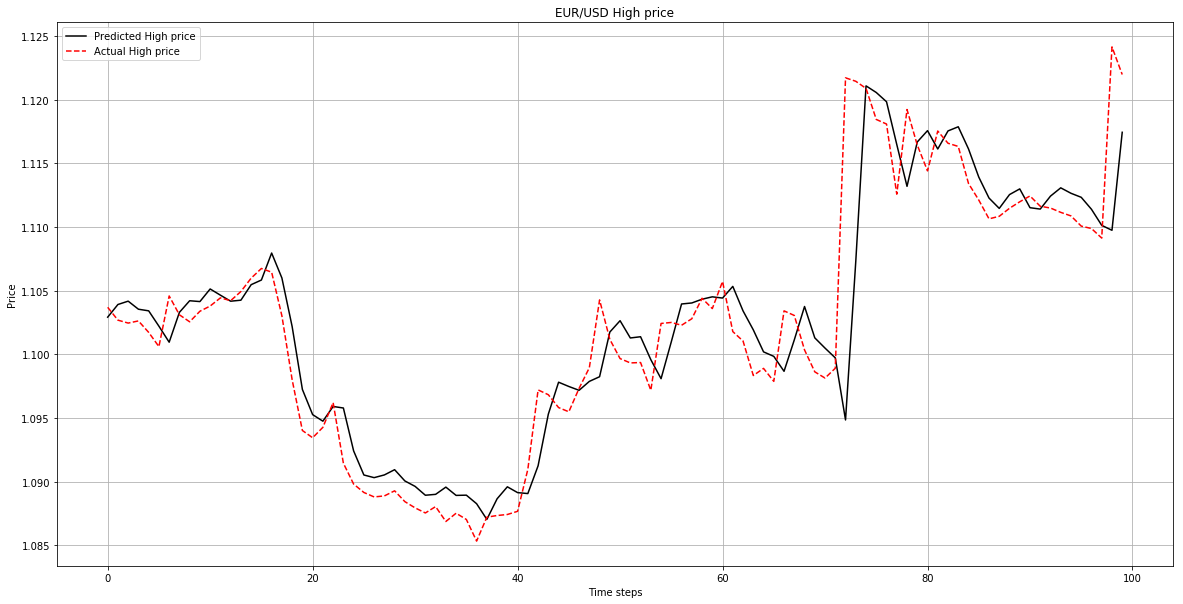

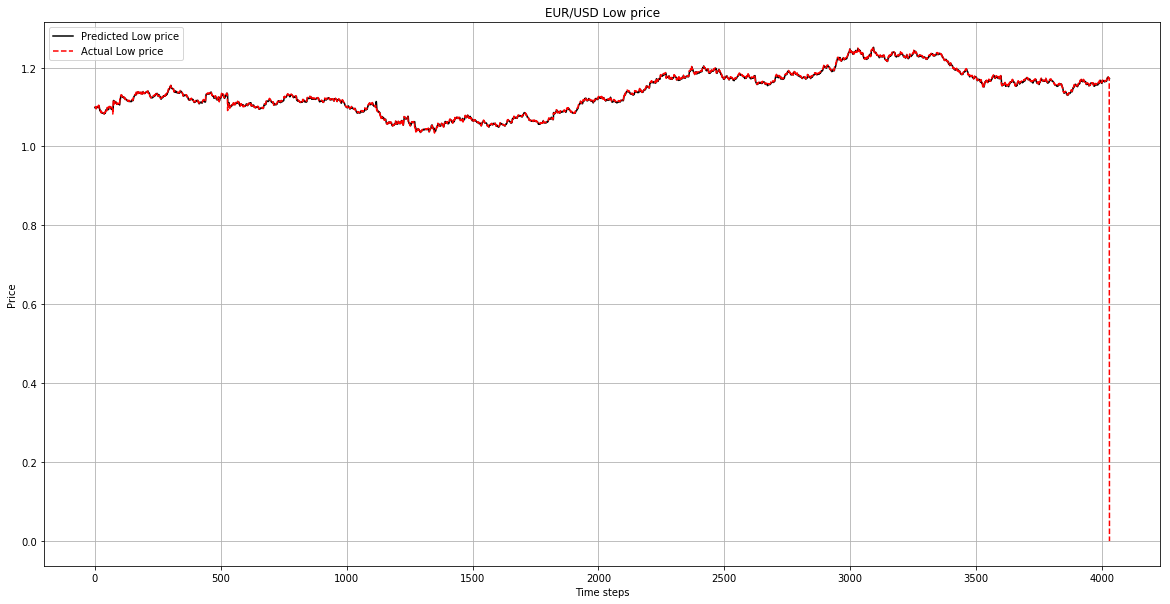

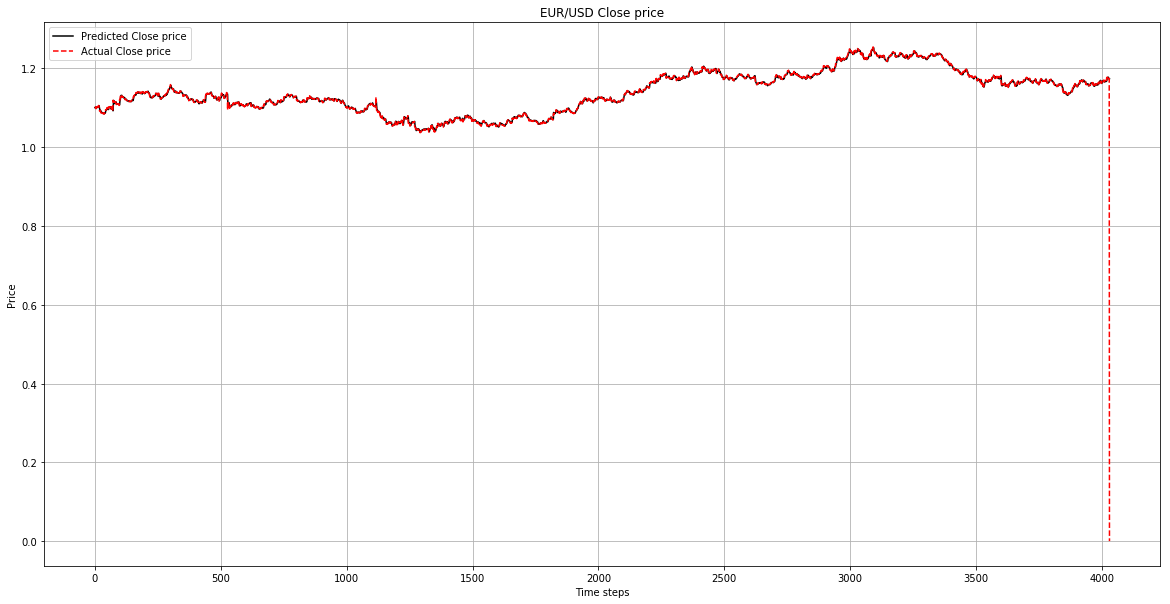

In [15]:
plt.figure(figsize=(20,10))
plt.plot(range(300), prediOpen[1500:1800],'k-', label = 'Predicted Open price');
plt.plot(range(300),actOpen[1500:1800],'r--', label = 'Actual Open price')
plt.xlabel('Time steps')
plt.ylabel('Price')
plt.title('EUR/USD Open price')
plt.grid(True)
plt.legend(loc = 'upper left')
            
plt.figure(figsize=(20,10))
plt.plot(range(100), prediHigh[:100],'k-', label = 'Predicted High price');
plt.plot(range(100),actHigh[:100],'r--', label = 'Actual High price')
plt.xlabel('Time steps')
plt.ylabel('Price')
plt.title('EUR/USD High price')
plt.grid(True)
plt.legend(loc = 'upper left')
            
plt.figure(figsize=(20,10))
plt.plot(range(prediLow.shape[0]), prediLow,'k-', label = 'Predicted Low price');
plt.plot(range(prediLow.shape[0]),actLow,'r--', label = 'Actual Low price')
plt.xlabel('Time steps')
plt.ylabel('Price')
plt.title('EUR/USD Low price')
plt.grid(True)
plt.legend(loc = 'upper left')
            
plt.figure(figsize=(20,10))
plt.plot(range(prediLow.shape[0]), prediClose,'k-', label = 'Predicted Close price');
plt.plot(range(prediLow.shape[0]),actClose,'r--', label = 'Actual Close price')
plt.xlabel('Time steps')
plt.ylabel('Price')
plt.title('EUR/USD Close price')
plt.grid(True)
plt.legend(loc = 'upper left')

In [21]:
prediOpen[0]


1.1005627

In [27]:
fn = 'data\open_LSTM_candle.txt'
text_file = open(fn, 'w')
#dataset = []   
for line in prediOpen:
    s = str(line) + '\n'    
    text_file.write(s)      
text_file.close()



fn = 'data\high_LSTM_candle.txt'
text_file = open(fn, 'w')
#dataset = []   
for line in prediHigh:
    s = str(line) + '\n'    
    text_file.write(s)      
text_file.close()


fn = 'data\low_LSTM_candle.txt'
text_file = open(fn, 'w')
#dataset = []   
for line in prediLow:
    s = str(line) + '\n'    
    text_file.write(s)       
text_file.close()


fn = 'data\close_LSTM_candle.txt'
text_file = open(fn, 'w')
#dataset = []   
for line in prediClose:
    s = str(line) + '\n'    
    text_file.write(s)      
text_file.close()

In [28]:
fn = 'data\open_ACT_candle.txt'
text_file = open(fn, 'w')
#dataset = []   
for line in actOpen:
    s = str(line) + '\n'    
    text_file.write(s)      
text_file.close()



fn = 'data\high_ACT_candle.txt'
text_file = open(fn, 'w')
#dataset = []   
for line in actHigh:
    s = str(line) + '\n'    
    text_file.write(s)      
text_file.close()


fn = 'data\low_ACT_candle.txt'
text_file = open(fn, 'w')
#dataset = []   
for line in actLow:
    s = str(line) + '\n'    
    text_file.write(s)       
text_file.close()


fn = 'data\close_ACT_candle.txt'
text_file = open(fn, 'w')
#dataset = []   
for line in actClose:
    s = str(line) + '\n'    
    text_file.write(s)      
text_file.close()